## part 1

In [1]:
import imageio as iio
import numpy as np
from matplotlib import pyplot as plt

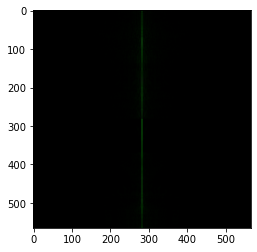

In [2]:
image = iio.imread('q1.jpg')
image_fourier = np.fft.fftshift(np.fft.fft2(image))
N = np.max(abs(image_fourier))
plt.imshow((255*abs(image_fourier/N)).astype(np.uint8));
iio.imwrite('q1_res01.jpg',(255*abs(image_fourier/N)).astype(np.uint8))

In [3]:
(m, n, color) = image_fourier.shape
sigma = m/2;
H_hp = np.zeros((m, n, color))
for i in range(m):
    for j in range(n):
            r = np.sqrt((i-m/2)**2+(j-n/2)**2)
            H_hp[i,j] = 1 - np.exp(-r**2/2/sigma**2)
#plt.imshow(255*H_hp, cmap='gray');
iio.imwrite('q1_res02.jpg',(255*H_hp/np.max(H_hp)).astype(np.uint8))

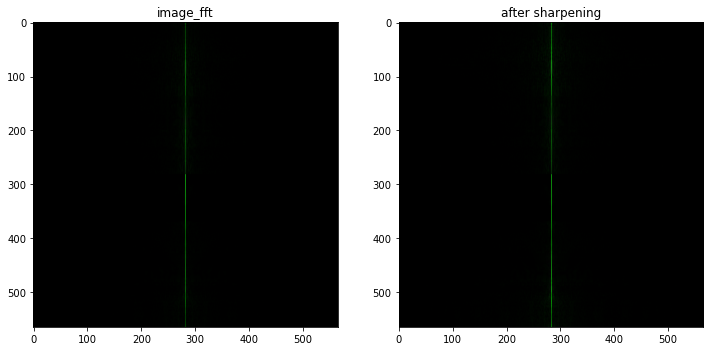

In [4]:
k = 2
sharpen1_fft = image_fourier + k*H_hp*image_fourier
N1 = np.max(abs(sharpen1_fft))
iio.imwrite('q1_res03.jpg',(255*abs(sharpen1_fft/N)).astype(np.uint8))

plt.figure(figsize = (12, 12))
plt.subplot(1,2,1)
plt.imshow((255*abs(image_fourier/N)).astype(np.uint8));
plt.title('image_fft')

plt.subplot(1,2,2)
plt.imshow((255*abs(sharpen1_fft/N1)).astype(np.uint8));
plt.title('after sharpening');

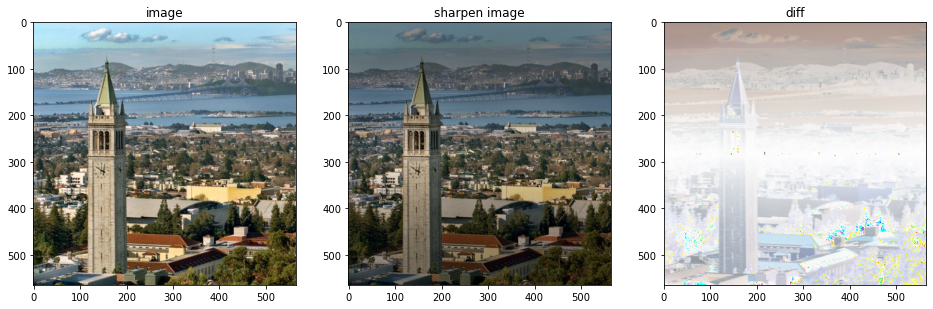

In [5]:
sharpen1 = np.abs(np.fft.ifft2(np.fft.ifftshift(sharpen1_fft)))
N1 = np.max(sharpen1)
iio.imwrite('q1_res04.jpg',(255*sharpen1/N1).astype(np.uint8))

plt.figure(figsize = (16, 12))
plt.subplot(1,3,1)
plt.imshow(image);
plt.title('image');

plt.subplot(1,3,2)
plt.imshow((255*sharpen1/N1).astype(np.uint8));
plt.title('sharpen image');

plt.subplot(1,3,3)
plt.imshow((255*sharpen1/N1).astype(np.uint8)-image);
plt.title('diff');

## part 2

In [6]:
image = iio.imread('q1.jpg')
F = np.fft.fftshift(np.fft.fft2(image))
(m, n, color) = F.shape
MaskR2 = np.zeros((m, n, color))
for i in range(m):
    for j in range(n):
        MaskR2 = 4*np.pi**2*((i-m/2)**2+(j-n/2)**2)
F1 = MaskR2*F #q1_res05
N1 = np.max(abs(F1))
iio.imwrite('q1_res05.jpg',abs(255*F1/N1).astype(np.uint8))

In [7]:
unsharpMask = np.abs(np.fft.ifft2(np.fft.ifftshift(F1)))
tempN = np.max(unsharpMask)
iio.imwrite('q1_res06.jpg',abs(255*unsharpMask/tempN).astype(np.uint8))

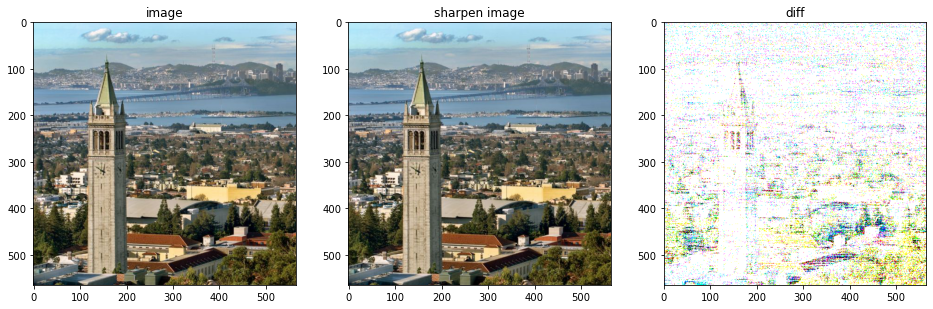

In [8]:
k = 2
Final = image + k*unsharpMask
tempN = np.max(Final)
iio.imwrite('q1_res07.jpg',abs(255*Final/tempN).astype(np.uint8))

plt.figure(figsize = (16, 12))
plt.subplot(1,3,1)
plt.imshow(image);
plt.title('image');

plt.subplot(1,3,2)
plt.imshow((255*Final/tempN).astype(np.uint8));
plt.title('sharpen image');

plt.subplot(1,3,3)
plt.imshow((255*Final/tempN).astype(np.uint8)-image);
plt.title('diff');